In [94]:
import os
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import pylab as pl
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score,  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.pyplot import plot
import cv2

In [95]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [96]:
path = '/content/gdrive/MyDrive/Dataset'

In [97]:
flat_data_arr = []
Categories = ['Normal', 'Abnormal']
print("Type y to give categories or type n to go with classification of Normal,Abnormal")
while True:
    check = input()
    if check == 'n' or check == 'y':
        break
    print("Please give a valid input (y/n)")
if check == 'y':
    print("Enter How Many types of Images do you want to classify")
    n = int(input())
    Categories = []
    print(f'please enter {n} names')
    for i in range(n):
        name = input()
        Categories.append(name)
    print(f"")
target_arr = []
# please use datadir='/content' if the files are upload on to google collab
# else mount the drive and give path of the parent-folder containing all category images folders.
datadir = '/content/gdrive/MyDrive/Dataset'
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df['Target'] = target

Type y to give categories or type n to go with classification of Normal,Abnormal
n
loading... category : Normal
loaded category:Normal successfully
loading... category : Abnormal
loaded category:Abnormal successfully


In [98]:
# train-test split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=77, stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [99]:
# svm
svm=SVC(probability=True, random_state=2, kernel='linear', degree=3, gamma='auto')
svm.fit(x_train, y_train)
y_perd= svm.predict(x_test)
# to save the trained model
svm_class="finalmodelsvm."
pickle.dump(svm, open(svm_class, 'wb'))
# to load the saved model
loaded_model= pickle.load(open(svm_class, 'rb'))
# to print the accuracy od the model
accuracy= accuracy_score(y_test, y_perd)
print("Model's accuracy is:", accuracy)

Model's accuracy is: 1.0


[[35  0]
 [ 0 17]]


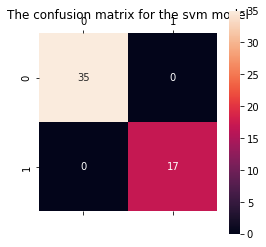

In [100]:
# to plot confusion matrix
cf_matrix= confusion_matrix(y_test, y_perd)
pl.matshow(cf_matrix)
pl.title("The confusion matrix for the svm model")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [101]:
y_perd

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [102]:
from sklearn.metrics import classification_report

In [103]:
classification_report(y_test, y_perd)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        35\n           1       1.00      1.00      1.00        17\n\n    accuracy                           1.00        52\n   macro avg       1.00      1.00      1.00        52\nweighted avg       1.00      1.00      1.00        52\n'

In [104]:
df = pd.DataFrame(x_test)

In [144]:
#df

In [106]:
df2 = pd.DataFrame(y_train)

In [107]:
df2

,Target
20,0
83,0
256,1
36,0
17,0
...,...
252,1
98,0
171,0
64,0


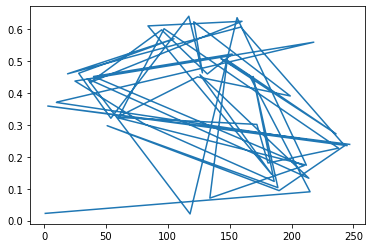

In [108]:
df[66999].plot()

In [109]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (207, 67500)
y_train shape: (207,)
x_test shape: (52, 67500)
y_test shape: (52,)


In [1]:
x= np.array(df.loc[3]).reshape(1,67500)

NameError: name 'np' is not defined

In [136]:
perdiction= svm.predict(x)

In [137]:
perdiction

array([0])

In [143]:
y_test[3]

0